# ch03.03 NLP기초 - 순환 신경망
---

* 날짜: 2022-07-15
* 이름: 고민수


## 학습내용
    - 순환 신경망에 대해 이해한다.
    - 패딩후 데이터 순서가 바뀐것에 대한 차이를 확인한다.
    - RNN
    - GRU
    - LSTM
    
* 조건 학습률 0.001 시작 patience = 3 으로 1/10 감소

## imdb 데이터셋
---

In [2]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [1]:
import tensorflow as tf
from tensorflow.keras import preprocessing, layers, Sequential, optimizers, callbacks
from Myfunc import show_lcurve

In [5]:
MAX_LEN = 300
MAX_FEATURES = 10000

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
x_train = preprocessing.sequence.pad_sequences(x_train,
                                               padding='post',
                                               maxlen=MAX_LEN)

x_test = preprocessing.sequence.pad_sequences(x_test,
                                              padding='post',
                                              maxlen=MAX_LEN)
print(x_train.shape, x_test.shape)

(25000, 300) (25000, 300)


* 단어의 순서를 바꾼 모델

In [6]:
x_train_rev = x_train[:,::-1]
x_test_rev = x_test[:,::-1]

## **| FCN with GlobalAveragePooling1D**

In [7]:
EMD_DIMS = 100
model = Sequential(name="GAP")
model.add(layers.Input(shape=MAX_LEN, name="Input"))
model.add(layers.Embedding(input_dim=10000, output_dim=EMD_DIMS, name="Embedding"))
model.add(layers.GlobalAveragePooling1D()) # channels_last 가 디폴트 , # channels_last 를 해주면 각 행별 평균을 한다
model.add(layers.Dense(1, activation="sigmoid", name="Classification"))

model_rev = Sequential(name="GAP_rev")
model_rev.add(layers.Input(shape=MAX_LEN, name="Input"))
model_rev.add(layers.Embedding(input_dim=10000, output_dim=EMD_DIMS, name="Embedding"))
model_rev.add(layers.GlobalAveragePooling1D()) # channels_last 가 디폴트 , # channels_last 를 해주면 각 행별 평균을 한다
model_rev.add(layers.Dense(1, activation="sigmoid", name="Classification"))

optimizer = optimizers.RMSprop(learning_rate=0.001)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_acc",
                                        patience=3,
                                        factor=0.1)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])
model_rev.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])

model.summary()

Model: "GAP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
Classification (Dense)       (None, 1)                 101       
Total params: 1,000,101
Trainable params: 1,000,101
Non-trainable params: 0
_________________________________________________________________


In [8]:
history_gap = model.fit(x_train,
                        y_train,
                        epochs=15,
                        batch_size=128,
                        validation_split=0.2,
                        verbose=1,
                        callbacks=[reduce_lr])

Epoch 1/15
157/157 [==============================] - 4s 16ms/step - loss: 0.6823 - acc: 0.6437 - val_loss: 0.6359 - val_acc: 0.7714
Epoch 2/15
157/157 [==============================] - 2s 13ms/step - loss: 0.6147 - acc: 0.7865 - val_loss: 0.5535 - val_acc: 0.7998
Epoch 3/15
157/157 [==============================] - 2s 13ms/step - loss: 0.5307 - acc: 0.8179 - val_loss: 0.4767 - val_acc: 0.8324
Epoch 4/15
157/157 [==============================] - 2s 13ms/step - loss: 0.4515 - acc: 0.8498 - val_loss: 0.4181 - val_acc: 0.8420
Epoch 5/15
157/157 [==============================] - 2s 13ms/step - loss: 0.3863 - acc: 0.8683 - val_loss: 0.3727 - val_acc: 0.8632
Epoch 6/15
157/157 [==============================] - 2s 13ms/step - loss: 0.3361 - acc: 0.8829 - val_loss: 0.3426 - val_acc: 0.8696
Epoch 7/15
157/157 [==============================] - 2s 13ms/step - loss: 0.3023 - acc: 0.8911 - val_loss: 0.3224 - val_acc: 0.8760
Epoch 8/15
157/157 [==============================] - 2s 13ms/step - 

In [9]:
history_gap_rev = model_rev.fit(x_train_rev,y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1,callbacks=[reduce_lr])

Epoch 1/15
157/157 [==============================] - 3s 14ms/step - loss: 0.6819 - acc: 0.6454 - val_loss: 0.6355 - val_acc: 0.7492
Epoch 2/15
157/157 [==============================] - 2s 14ms/step - loss: 0.6159 - acc: 0.7779 - val_loss: 0.5531 - val_acc: 0.8038
Epoch 3/15
157/157 [==============================] - 2s 13ms/step - loss: 0.5284 - acc: 0.8253 - val_loss: 0.4755 - val_acc: 0.8334
Epoch 4/15
157/157 [==============================] - 2s 14ms/step - loss: 0.4505 - acc: 0.8527 - val_loss: 0.4168 - val_acc: 0.8494
Epoch 5/15
157/157 [==============================] - 2s 14ms/step - loss: 0.3815 - acc: 0.8721 - val_loss: 0.3716 - val_acc: 0.8632
Epoch 6/15
157/157 [==============================] - 2s 13ms/step - loss: 0.3364 - acc: 0.8808 - val_loss: 0.3438 - val_acc: 0.8684
Epoch 7/15
157/157 [==============================] - 2s 13ms/step - loss: 0.3026 - acc: 0.8925 - val_loss: 0.3219 - val_acc: 0.8768
Epoch 8/15
157/157 [==============================] - 2s 13ms/step - 

* 단어의 순서를 바꿨을때와 그대로일때 동일한 성능을 보인다

## RNN
---

<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442110/image6_f6vds6.png width=800>
</p>

In [14]:
model = Sequential(name="RNN")
model.add(layers.Input(shape=MAX_LEN, name="Input"))
model.add(layers.Embedding(input_dim=10000, output_dim=EMD_DIMS, name="Embedding"))
model.add(layers.SimpleRNN(20, name="RNN")) # channels_last 가 디폴트 , # channels_last 를 해주면 각 행별 평균을 한다
model.add(layers.Dense(1, activation="sigmoid", name="classifier"))
model.summary()

model_rev = Sequential(name="RNN_rev")
model_rev.add(layers.Input(shape=MAX_LEN, name="Input"))
model_rev.add(layers.Embedding(input_dim=10000, output_dim=EMD_DIMS, name="Embedding"))
model_rev.add(layers.SimpleRNN(20, name="RNN")) # channels_last 가 디폴트 , # channels_last 를 해주면 각 행별 평균을 한다
model_rev.add(layers.Dense(1, activation="sigmoid", name="classifier"))

optimizer = optimizers.RMSprop(learning_rate=0.001)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_acc",
                                        patience=3,
                                        factor=0.1)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])
model_rev.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
RNN (SimpleRNN)              (None, 20)                2420      
_________________________________________________________________
classifier (Dense)           (None, 1)                 21        
Total params: 1,002,441
Trainable params: 1,002,441
Non-trainable params: 0
_________________________________________________________________


* RNN 의 파라미터 개수 : (32 * 30)+(30 * 30) + (1 * 30) = 1890
* (RNN * RNN) + (Input_dim * RNN) + (RNN_dim * RNN)

In [16]:
history_rnn = model.fit(x_train,y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1,callbacks=[reduce_lr])

Epoch 1/15
157/157 [==============================] - 44s 268ms/step - loss: 0.6961 - acc: 0.4948 - val_loss: 0.6952 - val_acc: 0.4960
Epoch 2/15
157/157 [==============================] - 39s 249ms/step - loss: 0.6946 - acc: 0.4989 - val_loss: 0.6949 - val_acc: 0.4976
Epoch 3/15
157/157 [==============================] - 40s 255ms/step - loss: 0.6939 - acc: 0.4991 - val_loss: 0.6946 - val_acc: 0.4982
Epoch 4/15
157/157 [==============================] - 41s 260ms/step - loss: 0.6926 - acc: 0.5064 - val_loss: 0.6945 - val_acc: 0.4966
Epoch 5/15
157/157 [==============================] - 40s 257ms/step - loss: 0.6920 - acc: 0.5103 - val_loss: 0.6943 - val_acc: 0.5060
Epoch 6/15
157/157 [==============================] - 40s 256ms/step - loss: 0.6912 - acc: 0.5209 - val_loss: 0.6942 - val_acc: 0.5056
Epoch 7/15
157/157 [==============================] - 41s 258ms/step - loss: 0.6903 - acc: 0.5200 - val_loss: 0.6941 - val_acc: 0.5058
Epoch 8/15
157/157 [==============================] - 4

In [15]:
history_rnn_rev = model_rev.fit(x_train_rev,y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1,callbacks=[reduce_lr], workers=-1)

Epoch 1/15
157/157 [==============================] - 43s 265ms/step - loss: 0.5916 - acc: 0.6809 - val_loss: 0.5215 - val_acc: 0.7886
Epoch 2/15
157/157 [==============================] - 41s 260ms/step - loss: 0.3748 - acc: 0.8529 - val_loss: 0.4702 - val_acc: 0.8138
Epoch 3/15
157/157 [==============================] - 41s 258ms/step - loss: 0.3674 - acc: 0.8591 - val_loss: 0.5447 - val_acc: 0.7144
Epoch 4/15
157/157 [==============================] - 41s 262ms/step - loss: 0.3069 - acc: 0.8788 - val_loss: 0.4356 - val_acc: 0.8210
Epoch 5/15
157/157 [==============================] - 42s 266ms/step - loss: 0.2467 - acc: 0.9104 - val_loss: 0.4135 - val_acc: 0.8432
Epoch 6/15
157/157 [==============================] - 40s 258ms/step - loss: 0.1899 - acc: 0.9337 - val_loss: 0.4967 - val_acc: 0.8334
Epoch 7/15
157/157 [==============================] - 41s 262ms/step - loss: 0.1528 - acc: 0.9490 - val_loss: 0.4554 - val_acc: 0.8408
Epoch 8/15
157/157 [==============================] - 4

## LSTM
---

<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442110/image3_nsnxp3.png width=600>
</p>



In [27]:
model = Sequential(name="LSTM")
model.add(layers.Input(shape=MAX_LEN, name="Input"))
model.add(layers.Embedding(input_dim=10000, output_dim=EMD_DIMS, name="Embedding"))
model.add(layers.LSTM(20, name="LSTM")) # channels_last 가 디폴트 , # channels_last 를 해주면 각 행별 평균을 한다
model.add(layers.Dense(1, activation="sigmoid", name="classifier"))

model_rev = Sequential(name="LSTM_rev")
model_rev.add(layers.Input(shape=MAX_LEN, name="Input"))
model_rev.add(layers.Embedding(input_dim=10000, output_dim=EMD_DIMS, name="Embedding"))
model_rev.add(layers.LSTM(20, name="LSTM")) # channels_last 가 디폴트 , # channels_last 를 해주면 각 행별 평균을 한다
model_rev.add(layers.Dense(1, activation="sigmoid", name="classifier"))

model.summary()

optimizer = optimizers.RMSprop(learning_rate=0.001)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_acc",
                                        patience=3,
                                        factor=0.1)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])
model_rev.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])

Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
LSTM (LSTM)                  (None, 20)                9680      
_________________________________________________________________
classifier (Dense)           (None, 1)                 21        
Total params: 1,009,701
Trainable params: 1,009,701
Non-trainable params: 0
_________________________________________________________________


* 파라미터 개수 : 4 * (101 * 20 + 20 * 20) = 9680
* params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)

In [11]:
history_lstm = model.fit(x_train,y_train,
                         epochs=15,
                         batch_size=128,
                         validation_split=0.2,
                         verbose=1,callbacks=[reduce_lr])

Epoch 1/15
157/157 [==============================] - 17s 61ms/step - loss: 0.6855 - acc: 0.5292 - val_loss: 0.6646 - val_acc: 0.6864
Epoch 2/15
157/157 [==============================] - 9s 55ms/step - loss: 0.5694 - acc: 0.7387 - val_loss: 0.5895 - val_acc: 0.7068
Epoch 3/15
157/157 [==============================] - 9s 57ms/step - loss: 0.5280 - acc: 0.7638 - val_loss: 0.4856 - val_acc: 0.8000
Epoch 4/15
157/157 [==============================] - 9s 58ms/step - loss: 0.4409 - acc: 0.8370 - val_loss: 0.4318 - val_acc: 0.8344
Epoch 5/15
157/157 [==============================] - 8s 53ms/step - loss: 0.3936 - acc: 0.8623 - val_loss: 0.4162 - val_acc: 0.8464
Epoch 6/15
157/157 [==============================] - 8s 54ms/step - loss: 0.3923 - acc: 0.8616 - val_loss: 0.4446 - val_acc: 0.8318
Epoch 7/15
157/157 [==============================] - 9s 57ms/step - loss: 0.3625 - acc: 0.8775 - val_loss: 0.4144 - val_acc: 0.8498
Epoch 8/15
157/157 [==============================] - 9s 60ms/step -

In [28]:
history_lstm_rev = model_rev.fit(x_train_rev,y_train,
                         epochs=15,
                         batch_size=128,
                         validation_split=0.2,
                         verbose=1,callbacks=[reduce_lr])

Epoch 1/15
157/157 [==============================] - 6s 33ms/step - loss: 0.6066 - acc: 0.6487 - val_loss: 0.3682 - val_acc: 0.8546
Epoch 2/15
157/157 [==============================] - 5s 32ms/step - loss: 0.3247 - acc: 0.8758 - val_loss: 0.3566 - val_acc: 0.8630
Epoch 3/15
157/157 [==============================] - 5s 32ms/step - loss: 0.2518 - acc: 0.9079 - val_loss: 0.3817 - val_acc: 0.8590
Epoch 4/15
157/157 [==============================] - 5s 32ms/step - loss: 0.2118 - acc: 0.9259 - val_loss: 0.4483 - val_acc: 0.8404
Epoch 5/15
157/157 [==============================] - 5s 32ms/step - loss: 0.1770 - acc: 0.9384 - val_loss: 0.3711 - val_acc: 0.8726
Epoch 6/15
157/157 [==============================] - 5s 30ms/step - loss: 0.1573 - acc: 0.9479 - val_loss: 0.4259 - val_acc: 0.8488
Epoch 7/15
157/157 [==============================] - 5s 30ms/step - loss: 0.1387 - acc: 0.9540 - val_loss: 0.4145 - val_acc: 0.8610
Epoch 8/15
157/157 [==============================] - 5s 32ms/step - 

### | **many-to-many**


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image9_e1gwba.png width=700>
</p>


In [24]:
EMD_DIMS = 100
model = Sequential(name="LSTM_mtm")
model.add(layers.Input(shape=MAX_LEN, name="Input"))
model.add(layers.Embedding(input_dim=10000, output_dim=EMD_DIMS, name="Embedding"))
model.add(layers.LSTM(20, return_sequences=True, name="LSTM_1"))
model.add(layers.LSTM(20, return_sequences=True, name="LSTM_2"))
model.add(layers.LSTM(20, return_sequences=False, name="LSTM_3"))
# return_sequences=True 이면 output이 2차텐서 (,256,32)
# return_sequences=False 이면 output이 1차텐서 (,32)
model.add(layers.Dense(1, activation="sigmoid", name="classifier"))
model.summary()

optimizer = optimizers.RMSprop(learning_rate=0.001)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_acc",
                                        patience=3,
                                        factor=0.1)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])

Model: "LSTM_mtm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
LSTM_1 (LSTM)                (None, 300, 20)           9680      
_________________________________________________________________
LSTM_2 (LSTM)                (None, 300, 20)           3280      
_________________________________________________________________
LSTM_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
classifier (Dense)           (None, 1)                 21        
Total params: 1,016,261
Trainable params: 1,016,261
Non-trainable params: 0
_________________________________________________________________


In [25]:
history_lstm_mtm = model.fit(x_train_rev, y_train,
                             epochs=15,
                             batch_size=128,
                             validation_split=0.2,
                             verbose=1,callbacks=[reduce_lr])

Epoch 1/15
157/157 [==============================] - 16s 76ms/step - loss: 0.5766 - acc: 0.6701 - val_loss: 0.3964 - val_acc: 0.8406
Epoch 2/15
157/157 [==============================] - 11s 69ms/step - loss: 0.3170 - acc: 0.8793 - val_loss: 0.4374 - val_acc: 0.8252
Epoch 3/15
157/157 [==============================] - 10s 62ms/step - loss: 0.2597 - acc: 0.9068 - val_loss: 0.3244 - val_acc: 0.8698
Epoch 4/15
157/157 [==============================] - 10s 65ms/step - loss: 0.2100 - acc: 0.9254 - val_loss: 0.3724 - val_acc: 0.8634
Epoch 5/15
157/157 [==============================] - 10s 63ms/step - loss: 0.1777 - acc: 0.9380 - val_loss: 0.3297 - val_acc: 0.8730
Epoch 6/15
157/157 [==============================] - 10s 64ms/step - loss: 0.1524 - acc: 0.9469 - val_loss: 0.3335 - val_acc: 0.8732
Epoch 7/15
157/157 [==============================] - 10s 67ms/step - loss: 0.1254 - acc: 0.9576 - val_loss: 0.3947 - val_acc: 0.8720
Epoch 8/15
157/157 [==============================] - 11s 69ms

## GRU
---


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image10_zgefie.png width=600>
</p>



In [10]:
model = Sequential(name="GRU")
model.add(layers.Input(shape=MAX_LEN, name="Input"))
model.add(layers.Embedding(input_dim=10000, output_dim=EMD_DIMS, name="Embedding"))
model.add(layers.GRU(20, name="GRU")) # channels_last 가 디폴트 , # channels_last 를 해주면 각 행별 평균을 한다
model.add(layers.Dense(1, activation="sigmoid", name="classifier"))

model_rev = Sequential(name="GRU_rev")
model_rev.add(layers.Input(shape=MAX_LEN, name="Input"))
model_rev.add(layers.Embedding(input_dim=10000, output_dim=EMD_DIMS, name="Embedding"))
model_rev.add(layers.GRU(20, name="GRU")) # channels_last 가 디폴트 , # channels_last 를 해주면 각 행별 평균을 한다
model_rev.add(layers.Dense(1, activation="sigmoid", name="classifier"))

model.summary()

optimizer = optimizers.RMSprop(learning_rate=0.001)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_acc",
                                        patience=3,
                                        factor=0.1)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])
model_rev.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])

Model: "GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
GRU (GRU)                    (None, 20)                7320      
_________________________________________________________________
classifier (Dense)           (None, 1)                 21        
Total params: 1,007,341
Trainable params: 1,007,341
Non-trainable params: 0
_________________________________________________________________


In [11]:
history_gru = model.fit(x_train, y_train,
                             epochs=15,
                             batch_size=128,
                             validation_split=0.2,
                             verbose=1,callbacks=[reduce_lr])

Epoch 1/15
157/157 [==============================] - 8s 35ms/step - loss: 0.6916 - acc: 0.5155 - val_loss: 0.6800 - val_acc: 0.5384
Epoch 2/15
157/157 [==============================] - 5s 32ms/step - loss: 0.6595 - acc: 0.5933 - val_loss: 0.5386 - val_acc: 0.7416
Epoch 3/15
157/157 [==============================] - 5s 32ms/step - loss: 0.5656 - acc: 0.7406 - val_loss: 0.5554 - val_acc: 0.7828
Epoch 4/15
157/157 [==============================] - 5s 32ms/step - loss: 0.4896 - acc: 0.7982 - val_loss: 0.5146 - val_acc: 0.7752
Epoch 5/15
157/157 [==============================] - 5s 33ms/step - loss: 0.4630 - acc: 0.8132 - val_loss: 0.4965 - val_acc: 0.7960
Epoch 6/15
157/157 [==============================] - 5s 32ms/step - loss: 0.4527 - acc: 0.8204 - val_loss: 0.4728 - val_acc: 0.8156
Epoch 7/15
157/157 [==============================] - 5s 32ms/step - loss: 0.4283 - acc: 0.8338 - val_loss: 0.4662 - val_acc: 0.8178
Epoch 8/15
157/157 [==============================] - 5s 33ms/step - 

In [12]:
history_gru_rev = model_rev.fit(x_train_rev, y_train,
                             epochs=15,
                             batch_size=128,
                             validation_split=0.2,
                             verbose=1,callbacks=[reduce_lr])

Epoch 1/15
157/157 [==============================] - 6s 31ms/step - loss: 0.6928 - acc: 0.5168 - val_loss: 0.6922 - val_acc: 0.5366
Epoch 2/15
157/157 [==============================] - 5s 33ms/step - loss: 0.6911 - acc: 0.5621 - val_loss: 0.6907 - val_acc: 0.5604
Epoch 3/15
157/157 [==============================] - 5s 31ms/step - loss: 0.6880 - acc: 0.5948 - val_loss: 0.6878 - val_acc: 0.5748
Epoch 4/15
157/157 [==============================] - 5s 31ms/step - loss: 0.6818 - acc: 0.6213 - val_loss: 0.6818 - val_acc: 0.5876
Epoch 5/15
157/157 [==============================] - 5s 31ms/step - loss: 0.6713 - acc: 0.6295 - val_loss: 0.6699 - val_acc: 0.6032
Epoch 6/15
157/157 [==============================] - 5s 32ms/step - loss: 0.6492 - acc: 0.6508 - val_loss: 0.6438 - val_acc: 0.6324
Epoch 7/15
157/157 [==============================] - 5s 32ms/step - loss: 0.6014 - acc: 0.6895 - val_loss: 0.5415 - val_acc: 0.7238
Epoch 8/15
157/157 [==============================] - 5s 30ms/step - 

### | **many-to-many**


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image9_e1gwba.png width=700>
</p>


In [16]:
EMD_DIMS = 100
model = Sequential(name="GRU_mtm")
model.add(layers.Input(shape=MAX_LEN, name="Input"))
model.add(layers.Embedding(input_dim=10000, output_dim=EMD_DIMS, name="Embedding"))
model.add(layers.GRU(20, return_sequences=True, name="GRU_1"))
model.add(layers.GRU(20, return_sequences=True, name="GRU_2"))
model.add(layers.GRU(20, return_sequences=False, name="GRU_3"))
# return_sequences=True 이면 output이 2차텐서 (,256,32)
# return_sequences=False 이면 output이 1차텐서 (,32)
model.add(layers.Dense(1, activation="sigmoid", name="classifier"))
model.summary()

optimizer = optimizers.RMSprop(learning_rate=0.001)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_acc",
                                        patience=3,
                                        factor=0.1)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])

Model: "GRU_mtm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
GRU_1 (GRU)                  (None, 300, 20)           7320      
_________________________________________________________________
GRU_2 (GRU)                  (None, 300, 20)           2520      
_________________________________________________________________
GRU_3 (GRU)                  (None, 20)                2520      
_________________________________________________________________
classifier (Dense)           (None, 1)                 21        
Total params: 1,012,381
Trainable params: 1,012,381
Non-trainable params: 0
_________________________________________________________________


In [17]:
history_gru_mtm = model.fit(x_train, y_train,
                            epochs=15,
                            batch_size=128,
                            validation_split=0.2,
                            verbose=1,callbacks=[reduce_lr])

Epoch 1/15
157/157 [==============================] - 15s 73ms/step - loss: 0.6914 - acc: 0.5147 - val_loss: 0.6937 - val_acc: 0.5346
Epoch 2/15
157/157 [==============================] - 10s 67ms/step - loss: 0.6532 - acc: 0.5698 - val_loss: 0.6613 - val_acc: 0.5560
Epoch 3/15
157/157 [==============================] - 10s 67ms/step - loss: 0.6167 - acc: 0.5982 - val_loss: 0.5279 - val_acc: 0.7758
Epoch 4/15
157/157 [==============================] - 11s 67ms/step - loss: 0.5750 - acc: 0.6931 - val_loss: 0.4787 - val_acc: 0.7994
Epoch 5/15
157/157 [==============================] - 10s 66ms/step - loss: 0.4505 - acc: 0.8207 - val_loss: 0.4514 - val_acc: 0.8266
Epoch 6/15
157/157 [==============================] - 11s 67ms/step - loss: 0.4487 - acc: 0.8187 - val_loss: 0.4605 - val_acc: 0.8254
Epoch 7/15
157/157 [==============================] - 10s 61ms/step - loss: 0.3959 - acc: 0.8537 - val_loss: 0.4464 - val_acc: 0.8268
Epoch 8/15
157/157 [==============================] - 11s 71ms

# 결론

## GAP

* Train set을 뒤집는 것은 큰 상관이 없다

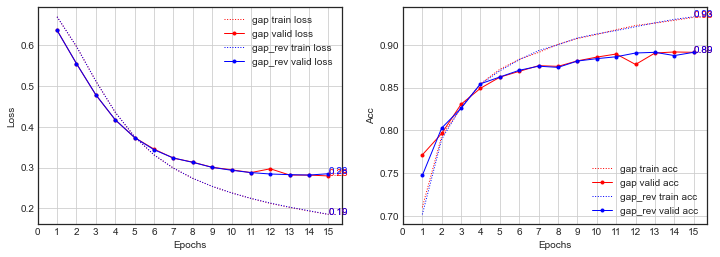

In [9]:
show_lcurve([history_gap, history_gap_rev], ["gap","gap_rev"], ["r","b"])

## GAP vs RNN

* 여전히 RNN 모델보다 GAP 모델이 더 뛰어난 성능을 보인다.
    - 이는 긍정 / 부정을 분류하는데에 전/후 맥락을 파악하는데 유리한 RNN 모델보다 부정 / 긍정의 단어를 파악하는 것이 더 효과적일수도 있다.
* RNN 모델에서 Train set 을 뒤집었을때 성능이 급격히 상승했다.
    - 이는 RNN 모델 특성상 가장 앞에 나온 데이터는 데이터의 끝에서 거의 잊혀지기 때문이다.
    - 현재 Train set은 뒤가 0 으로 padding 되어있기때문에 0의 데이터가 있기때문에 원래의 데이터가 잊혀질 확률이 높다.

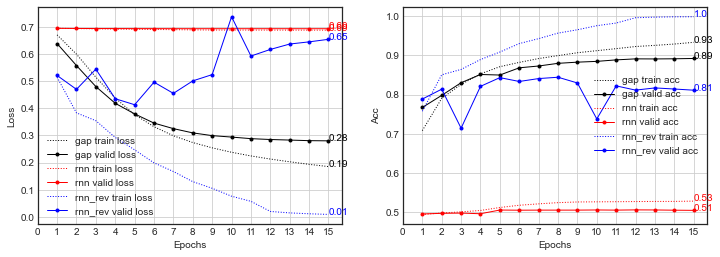

In [21]:
show_lcurve([history_gap, history_rnn, history_rnn_rev],["gap","rnn","rnn_rev"],["k","r","b"])

## GAP vs LSTM

* Train set을 뒤집은 경우 GAP와 거의 비슷한 성능을 보인다.
    - 하지만 여전히 일반 데이터를 사용하면 성능이 비교적 낮게 나온다.

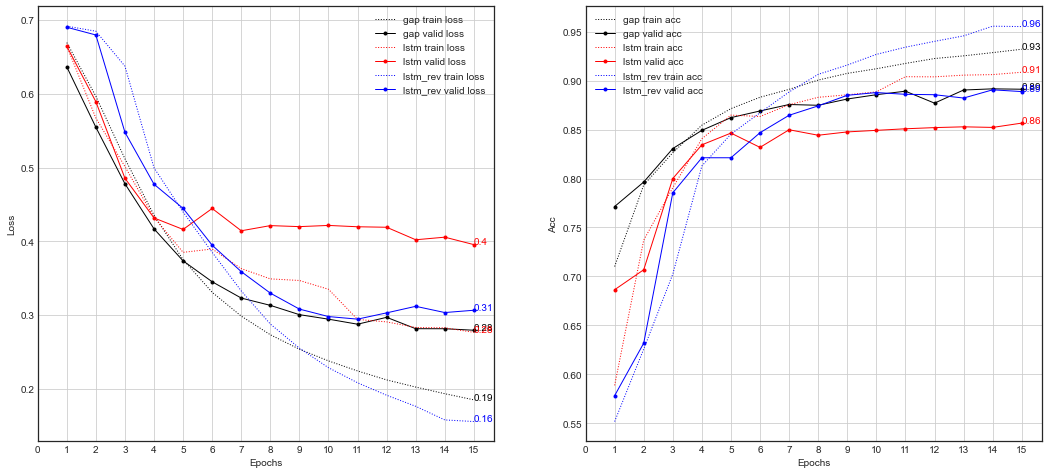

In [13]:
show_lcurve([history_gap, history_lstm, history_lstm_rev],["gap","lstm","lstm_rev"],["k","r","b"], size=(18,8))

## LSTM vs LSTM (Many To Many)

* 거의 동일한 정확도를 보인다. 마찬가지로 GAP의 정확도에 근사했지만 속도면에서는 크게 차이가 난다.

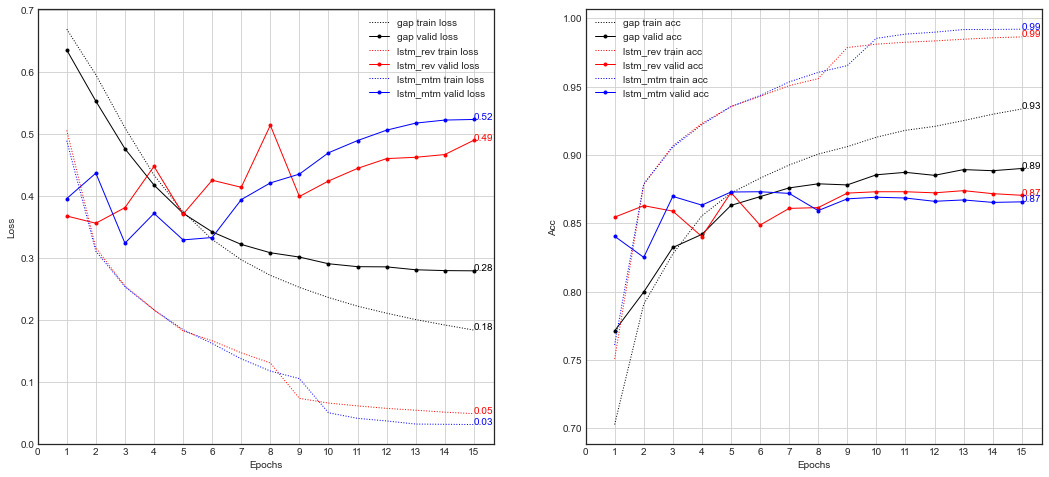

In [30]:
show_lcurve([history_gap,history_lstm_rev, history_lstm_mtm],["gap","lstm_rev","lstm_mtm"],["k","r","b"], size=(18,8))

## GAP vs GRU

* LSTM 보다 약간더 낮은 성능을 보인다.
    - 특이한 점은 뒤집은 데이터셋으로 학습할때 초반부분 성능이 증가하지 않다가 급격히 증가하는 부분이 있었다.

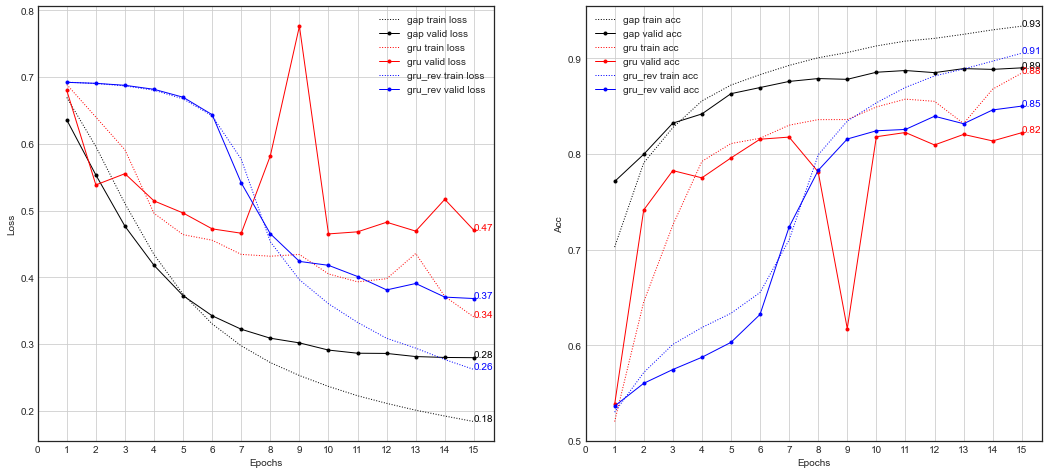

In [22]:
show_lcurve([history_gap, history_gru, history_gru_rev],["gap","gru","gru_rev"],["k","r","b"], size=(18,8))

## GRU vs GRU (Many To Many)

* 둘 다 같은 뒤집은 데이터 셋을 사용했지만 여러층을 쌓은 GRU에서 초반부분 가파르게 성능향상이 있었다.
* 하지만 둘다 GAP의 성능을 따라잡지는 못했다.

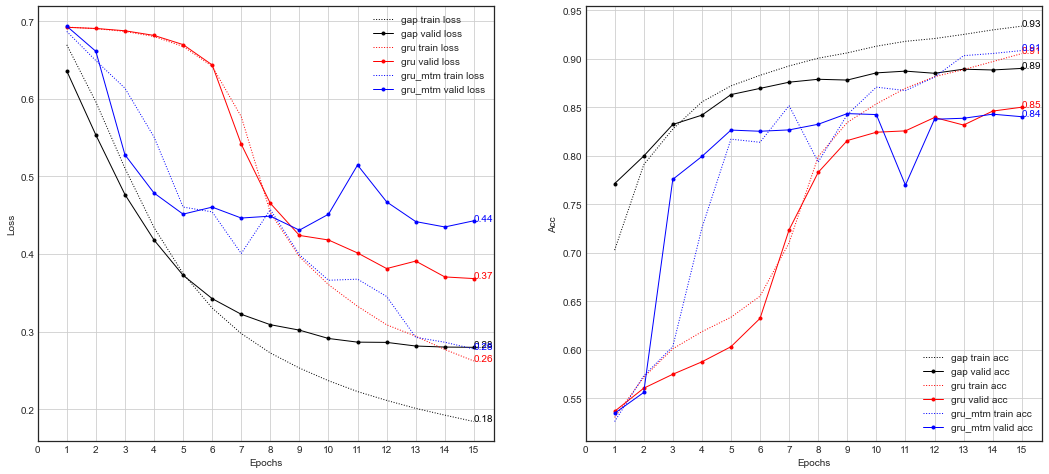

In [21]:
show_lcurve([history_gap, history_gru_rev, history_gru_mtm],["gap","gru","gru_mtm"],["k","r","b"], size=(18,8))